In [1]:
import importlib.util
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import sklearn
import pickle
import sys


In [2]:
# importing utility file 
spec = importlib.util.spec_from_file_location("Util","/home/admin172/Machine-Learning-Fellowship/week10/Utility/util_class.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
util_obj = foo.Util()

In [3]:
#load and csv file
data_module= pd.read_csv("Social_Network_Ads.csv")
data_module.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
data_module.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data_module =data_module[['Age','EstimatedSalary','Purchased']]

In [7]:
#split dataset into train and test
train,test = util_obj.split(data_module,0.3)

train :  (280, 3)  test :  (120, 3)


In [8]:
train_module= pd.read_csv('train.csv')

In [9]:
# #split dataset into train and test
train_data,cv_data = util_obj.split(train,0.3)

train :  (196, 3)  test :  (84, 3)


In [10]:
x_train= train_data.iloc[:,[0,1]].values
y_train = train_data.iloc[:,2].values
print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (196, 2)
y_train (196,)


In [11]:
#feature scalling
sc_x = StandardScaler()
# sc_y= StandardScaler()
x_train =sc_x.fit_transform(x_train)
# y_train =sc_y.transform(y_train.reshape(-1,1))
# print(x_train.shape,y_train.shape)

In [12]:
#  cv_data.to_csv("cv_data.csv",index=0)

In [13]:
cv_data = pd.read_csv("cv_data.csv")

In [14]:
cv_x= cv_data.iloc[:,[0,1]].values
cv_y=cv_data.iloc[:,2].values
print('cross validate data x',cv_x.shape)
print('cross validate data y',cv_y.shape)

cross validate data x (84, 2)
cross validate data y (84,)


In [15]:
#feature scalling
sc_cv_x = StandardScaler()
# sc_cv_y= StandardScaler()
cv_x= sc_cv_x.fit_transform(cv_x)
# cv_y =sc_cv_y.fit_transform(cv_y)

In [16]:
classifier =DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
predict value [0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 0]
confusion matrix is: [[145   0]
 [  0  51]]
accuracy 100.0


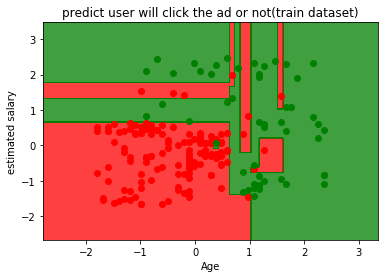

In [17]:
class Decision_Regression:
    def decision_model(self,x_train,y_train):
        classifier =DecisionTreeClassifier(random_state=0)
        classifier.fit(x_train,y_train)
#         print(x_train,y_train)
        return classifier
def main():
    obj =Decision_Regression()
    
    classifier = obj.decision_model(x_train,y_train)
    print(classifier)
    
    predict = util_obj.predict(x_train,classifier)
    print("predict value",predict)
    
    cm = util_obj.confusion_matrix(y_train,predict)
    print('confusion matrix is:',cm)
   
    accuracy = util_obj.accuracy(predict,y_train)
    print("accuracy",accuracy)
    
#     util_obj.create_pickle(classifier,'DecisionRegression.pkl' )
#     print("Pikle file created")
    
    util_obj.visualization(x_train,y_train,predict,classifier)

if __name__ == '__main__':
    main()
        
        

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
predict value [0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 0 0 0 1 0 1]
confusion matrix is: [[50  0]
 [ 1 33]]
accuracy 98.80952380952381
Pikle file created


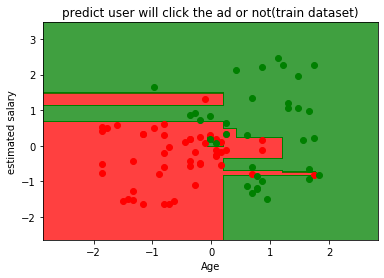

In [18]:
class Cross_validataion:
    def decision_model(self,cv_x,cv_y):
        classifier =DecisionTreeClassifier(random_state=0)
        classifier.fit(cv_x,cv_y)
#         print(x_train,y_train)
        return classifier
def main():
    obj =Cross_validataion()
    
    classifier = obj.decision_model(cv_x,cv_y)
    print(classifier)
    
    predict = util_obj.predict(cv_x,classifier)
    print("predict value",predict)
    
    cm = util_obj.confusion_matrix(cv_y,predict)
    print('confusion matrix is:',cm)
   
    accuracy = util_obj.accuracy(predict,cv_y)
    print("accuracy",accuracy)
   
    # pickle file
    util_obj.create_pickle(classifier,'decision.pkl' )
    print("Pikle file created")
    
    util_obj.visualization(cv_x,cv_y,predict,classifier)

if __name__ == '__main__':
    main()
        

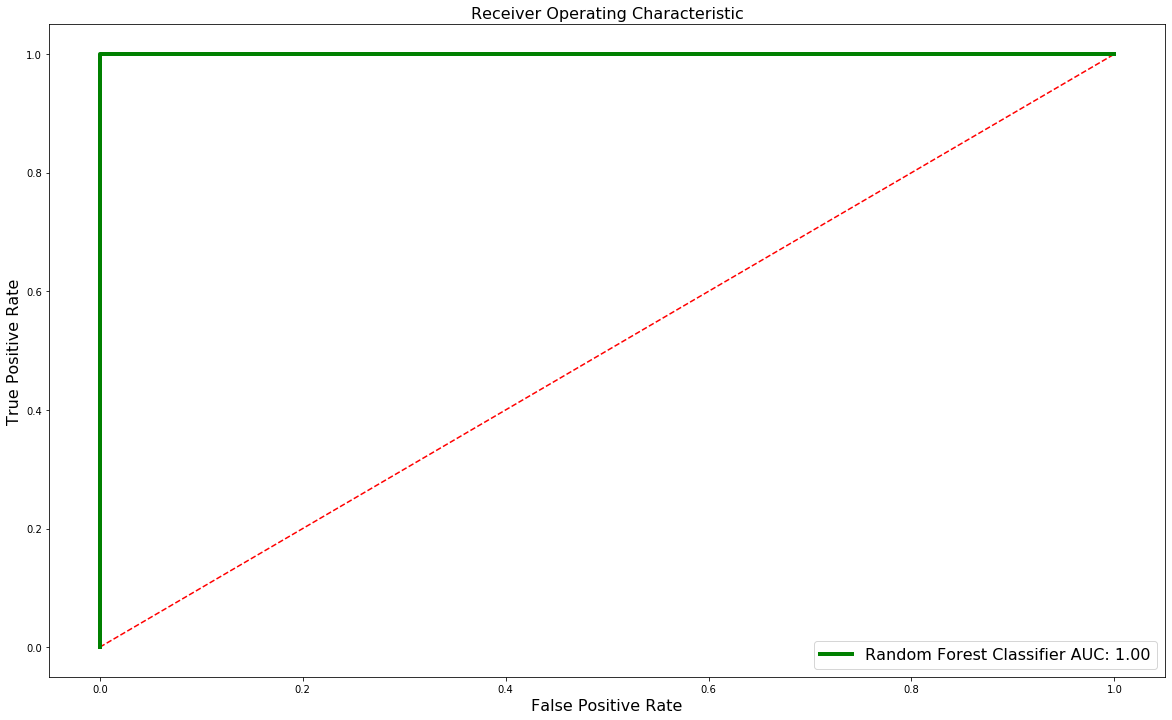

In [19]:
from sklearn.metrics import roc_curve, auc
# from sklearn.tree import DecisionTreeClassifier
def roc(x_train,y_train):
    plt.figure(figsize = (20, 12))
    plt.plot([0,1], [0,1], 'r--')
    classifier =DecisionTreeClassifier(random_state=0)
    classifier.fit(x_train,y_train)
    probs = classifier.predict_proba(x_train)
    # Reading probability of second class (Salary >= $200K)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    roc_auc = auc(fpr, tpr)
    
    label = 'Decision Tree Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)

roc(x_train,y_train)


Accuracy Rate for Support Vector Classifier: 1.0


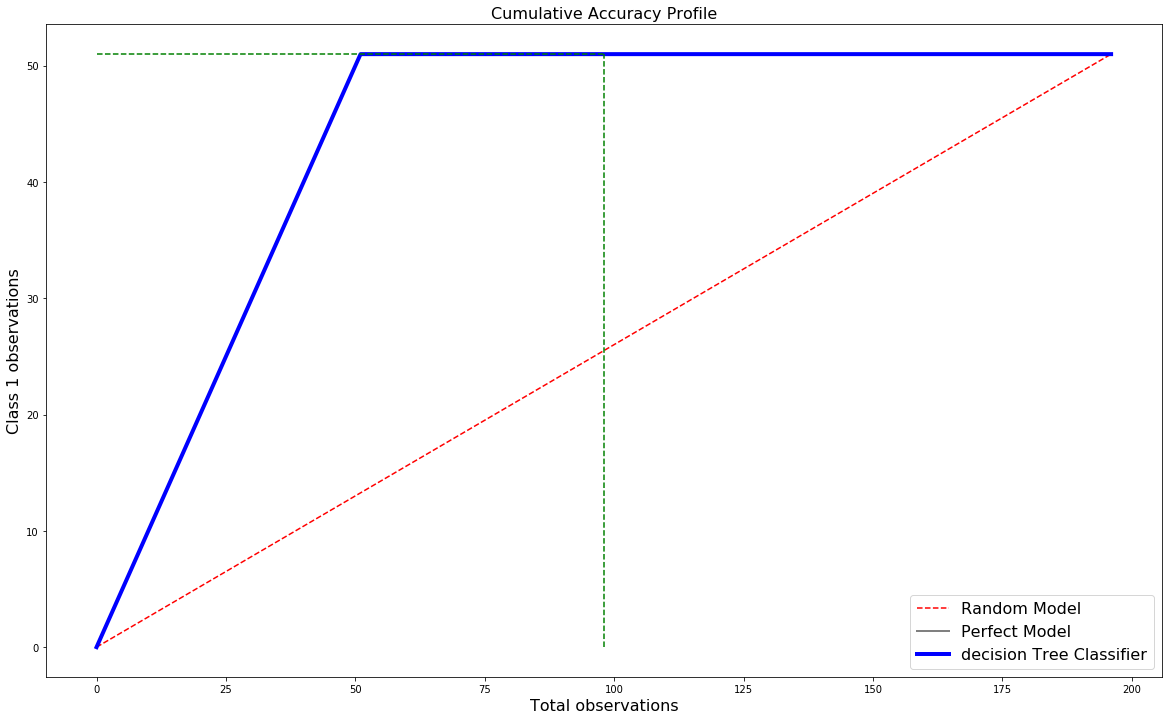

In [20]:

def cap(x_train,y_train):
    total = len(y_train)
    ## 60
    class_1_count = np.sum(y_train)
    ## 31
    class_0_count = total - class_1_count
    ## 29
    plt.figure(figsize = (20, 12))
    
    plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
    
    plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')
    
    probs = classifier.predict_proba(x_train)
    probs = probs[:, 1]
    model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    
    plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'decision Tree Classifier', 
         linewidth = 4)

    # Plot information
    plt.xlabel('Total observations', fontsize = 16)
    plt.ylabel('Class 1 observations', fontsize = 16)
    plt.title('Cumulative Accuracy Profile', fontsize = 16)
    plt.legend(loc = 'lower right', fontsize = 16)

    # Area under Random Model
    a = auc([0, total], [0, class_1_count])

    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
    ## Accuracy Rate for Support Vector Classifier: 0.9688542825361512
    
    # Point where vertical line will cut trained model
    index = int((50*total / 100))

    ## 50% Verticcal line from x-axis
    plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

    ## Horizontal line to y-axis from prediction model
    plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

    class_1_observed = y_values[index] * 100 / max(y_values)

cap(x_train,y_train)